In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time
import matplotlib
import base
import predict


import matplotlib
myfont = matplotlib.font_manager.FontProperties(fname=r'C:/Windows/Fonts/msyh.ttf')
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False   

%load_ext autoreload
%autoreload 2

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
#读取user_pay_count
user_pay_counts = base.ReadUserPayCountCSV();
#读取开店时间数据
shop_open_dates = base.ReadShopOpenDateCSV();
###读取商家信息
shop_infos = base.ReadShopInfoCSV();
##读取城市名称对照表
city_names = base.ReadCityNameCSV();
#读取休假表
calenders = base.ReadCalendarCSV();
#读取用户浏览数据表
user_view_counts = base.ReadUserViewCSV();

In [8]:
%reload_ext autoreload

In [12]:
df.values

array([ 17,  18,  10,   2,  15,   8,  11,  19,  15,  31,  25,  14,  24,
        22,  29,  35,  28,  22,  15,  33,  31,  30,  48,  32,  27,  22,
        19,  20,  31,  25,  17,  23,  19,  27,  13,  11,  20,  26,  28,
        29,  28,  21,  26,  36,  32,  44,  37,  43,  39,  52,  38,  45,
        25,  17,  35,  22,  27,  33,  23,  21,  27,  44,  40,  26,  24,
        24,  32,  20,  40,  21,  29,  35,   8,  25,  15,  34,  19,  45,
        25,  42,  90,  47,  26,  71,  46, 163,  48,  40,  45,  56,  59,
        50,  41,  36,  43,  44,  36,  41,  55,  47,  61,  43,  65,  47,
        43,  49,  37,  46,  42,  38,  49,  72,   0,  34,  42,   0,  43,
        33,  53,  28,  40,  18], dtype=int64)

In [32]:
def plotHolidayUserViewPayCounts(shop_id, day_type, start_time, end_time):
    holiday_df = base.getHolidayPayCount(
        shop_id, day_type, shop_open_dates, user_pay_counts, calenders, start_time, end_time)
    
    user_view_df = base.getShopViewCount(user_view_counts, shop_id, start_time, end_time)
    
    info = shop_infos.ix[shop_id]
    
    holiday_df['views'] = user_view_df.loc[holiday_df.index].values

    holiday_df = holiday_df.reset_index(drop=True)
    
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(holiday_df.index, holiday_df['count'], color='r', label="pay")
    ax.plot(holiday_df.index, holiday_df['views'], color='b', label="view")
    

    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    pay_mean_value = np.mean(holiday_df['count'])
    print('pay_mean_value=' + str(pay_mean_value))
    ax.axhline(y=pay_mean_value, linewidth=1, color='r')
    
    view_mean_value = np.mean(holiday_df['views'])
    print('view_mean_value=' + str(view_mean_value))
    ax.axhline(y=view_mean_value, linewidth=1, color='b')
    
    plt.legend()
    plt.show()

pay_mean_value=219.45217391304348
view_mean_value=1.9217391304347826


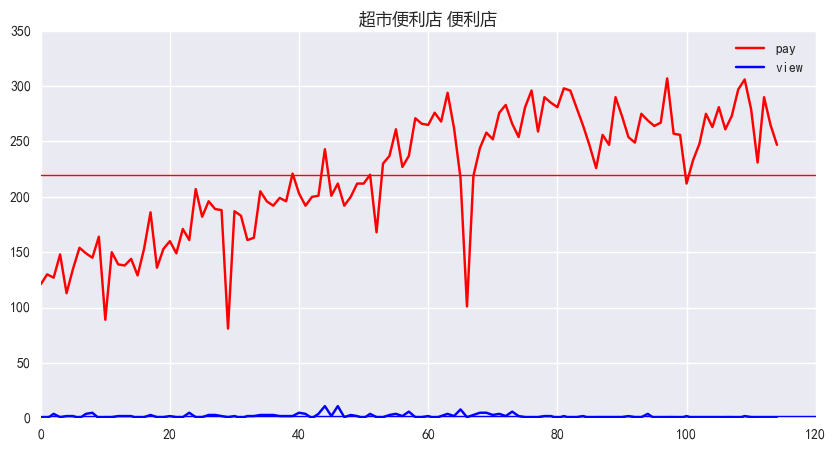

In [56]:
id = 1379
day_type = 1
plotHolidayUserViewPayCounts(id, day_type, pd.to_datetime('2016-4-1'), pd.to_datetime('2016-10-31'))

In [58]:
shop_infos[shop_infos['cate_1_name'] == '美食'].sort_values('per_pay')

,city,loc,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
id,,,,,,,,,
1529,珠海,50,1,3.0,2.0,0,美食,休闲茶饮,奶茶
1188,武汉,737,1,3.0,2.0,0,美食,休闲茶饮,奶茶
779,宁波,252,1,3.0,2.0,0,美食,休闲茶饮,奶茶
1185,武汉,209,1,1.0,0.0,0,美食,快餐,中式快餐
960,南京,284,1,3.0,1.0,0,美食,小吃,面点
493,厦门,10,1,2.0,0.0,0,美食,烘焙糕点,面包
1650,重庆,748,1,2.0,1.0,0,美食,休闲茶饮,咖啡
501,济南,528,1,4.0,1.0,0,美食,休闲茶饮,饮品/甜点
1370,济南,318,1,4.0,2.0,0,美食,休闲茶饮,奶茶


In [59]:
shop_infos[shop_infos['cate_1_name'] == '美食']['cate_2_name'].value_counts()

快餐             639
休闲茶饮           177
小吃             156
休闲食品           150
烘焙糕点           122
中餐              78
其他美食            44
火锅              33
烧烤               9
汤/粥/煲/砂锅/炖菜      7
Name: cate_2_name, dtype: int64